In [2]:
import pandas as pd 
df_cases=pd.read_csv('CasosPositivosCOVID-19_7Enero.csv',dtype={ 
                                                                'ID de caso':str,
                                                                'Código DIVIPOLA departamento':str,
                                                                'Nombre departamento':str,    
                                                                'Código DIVIPOLA municipio':str,    
                                                                'Nombre municipio':str,         
                                                                'Edad':int,        
                                                                'Unidad de medida de edad':str,     
                                                                'Sexo':str,     
                                                                'Código ISO del país':str,    
                                                                'Nombre del país':str,    
                                                                'Recuperado':str,    
                                                                
                                                                'Tipo de recuperación':str,       
                                                                'Pertenencia étnica':str,       
                                                                'Nombre del grupo étnico':str
                                                                },low_memory=False)


In [3]:
df_cases

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,...,380,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,"76,111",BUGA,34,1,M,...,724,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719766,6/1/2021 0:00:00,"1,719,807",23/12/2020 0:00:00,25,CUNDINAMARCA,"25,126",CAJICA,19,1,M,...,NaN,NaN,Activo,19/12/2020 0:00:00,NaN,3/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719767,6/1/2021 0:00:00,"1,719,808",22/12/2020 0:00:00,25,CUNDINAMARCA,"25,175",CHIA,19,1,M,...,NaN,NaN,Activo,18/12/2020 0:00:00,NaN,2/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719768,6/1/2021 0:00:00,"1,719,809",22/12/2020 0:00:00,25,CUNDINAMARCA,"25,175",CHIA,21,1,M,...,NaN,NaN,Activo,18/12/2020 0:00:00,NaN,2/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719769,6/1/2021 0:00:00,"1,719,810",20/12/2020 0:00:00,85,CASANARE,"85,001",YOPAL,19,1,M,...,NaN,NaN,Activo,14/12/2020 0:00:00,NaN,31/12/2020 0:00:00,NaN,NaN,NaN,NaN


# Aclaración:
Dado que el dataset es generado a nivel nacional por más de mil municipios que posee el país, y sus respectivos operadores como lo son las EPS e IPS y departamentos administrativos entre otros, se presentan variados tipos de datos que son las advertencias que se visualizan arriba.  


# Segmentación de datos y Columnas.
Con Base en los datos del dataframe df_Cases realizamos el Dataframe df_Model1, que será el punto de partida para la normalización.

In [4]:
# Creamos un nuevo Dataframe para reducir el numero de variables dejando las que necesitamos para la muestra.
df_model1=df_cases[['fecha reporte web','Código DIVIPOLA departamento','Nombre departamento','Sexo','Ubicación del caso','Edad','Recuperado']].dropna() 
#,'Pertenencia étnica','Nombre del grupo étnico'
#df_model1=df_cases[['Fecha de inicio de síntomas','Fecha de muerte','Código DIVIPOLA departamento','Nombre departamento','Sexo','Ubicación del caso','Unidad de medida de edad','Edad','Recuperado','Pertenencia étnica','Nombre del grupo étnico']]

# IMPORTANDO LAS LIBRERIAS
Procedemos a importar las librerias del modelo StatsModel:
Con la instrucción 
## **from __future__ import print_function**
Realizamos la importación del paquete de impresión de resultados
Con la instrucción
## **import statsmodels.api as sm**
importamos la libreria api principal del modelo StatsModel la cual nos trae los diferentes modelos de regresión, como lo son:
## **Ordinary Least Squares(OLS)** 
## **Generalized Least Squares(GLS)**, 
## **Generalized Least Squares with AR covariance structure(GLSAR)**
 Entre otras como tambien las imputaciones, Estimaciones.
Referencia: <https://www.statsmodels.org/stable/api.html
Con la instruccion: 
## **from patsy** 
importamos una de sus matrices estandarizadas llamada  dmatrices la cual nos permite convertir las listas de un dataframe en una matriz.


In [5]:
from __future__ import print_function
import statsmodels.api as sm
from patsy import dmatrices

# NORMALIZACION DE DATOS.
Con la siguiente Sentencia llamada def procedemos a realizar la primera normalización, convertir el genero femenino en una nueva columna, y haremos lo mismo con las demas columnas que se deban crear en el dataframe. 

In [6]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf =='F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_model1['Femenino']=df_model1.apply(generof,axis=1)

In [7]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_model1['Masculino']=df_model1.apply(generom,axis=1)

In [8]:
def alentados(fila):
    r=fila['Recuperado']
    if r=='Recuperado':
        re=1
        return re
    else:
        re=0
        return re
df_model1['Alentados']=df_model1.apply(alentados,axis=1)

In [9]:
def activos(fila):
    a=fila['Recuperado']
    if a=='Activo':
        ac=1
        return ac
    else:
        ac=0
        return ac
df_model1['Activos']=df_model1.apply(activos,axis=1)

In [10]:
def fallecidos(fila):
    f=fila['Recuperado']
    if f=='Fallecido' or f=='fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_model1['Fallecidos']=df_model1.apply(fallecidos,axis=1)

## CLUSTERING
En este caso para poder normalizar la edad, lo realizamos por clusters, por lo que con la función def, procedemos a realizar la division de las diferentes edades. 

In [11]:
#Dado que necesitamos mas de 20 regresores para que no se presenten problemas de colinealidad, realizamos un agrupamiento de 5 en 5
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=5:
        resultado="0-5"
        return resultado
    else:
        if decil>=6 and decil<=10:
            resultado="6-10"
            return resultado
        else:
            if decil>=11 and decil<=15:
                resultado="11-15"
                return resultado
            else:
                if decil>=16 and decil<=20:
                    resultado="16-20"
                    return resultado
                else:
                    if decil>=21 and decil<=25:
                        resultado="21-25"
                        return resultado
                    else:
                        if decil>=26 and decil<=30:
                            resultado="26-30"
                            return resultado
                        else:
                            if decil>=31 and decil<=35:
                                resultado="31-35"
                                return resultado
                            else:
                                if decil>=36 and decil<=40:
                                    resultado="36-40"
                                    return resultado
                                else:
                                    if decil>=41 and decil<=45:
                                        resultado="41-45"
                                        return resultado
                                    else:
                                        if decil>=46 and decil<=50:
                                            resultado="46-50"
                                            return resultado
                                        else:
                                            if decil>=51 and decil<=55:
                                                resultado="51-55"
                                                return resultado
                                            else:
                                                if decil>=56 and decil<=60:
                                                    resultado='56-60'
                                                    return resultado 
                                                else:
                                                    if decil>=61 and decil<=65:
                                                        resultado='61-65'
                                                        return resultado 
                                                    else:
                                                        if decil>=66 and decil<=70:
                                                            resultado='66-70'
                                                            return resultado 
                                                        else:
                                                            if decil>=71 and decil<=75:
                                                                resultado='71-75'
                                                                return resultado
                                                            else:
                                                                if decil>=76 and decil<=80:
                                                                    resultado='76-80'
                                                                    return resultado 
                                                                else:
                                                                    if decil>=81 and decil<=85:
                                                                        resultado='81-85'
                                                                        return resultado
                                                                    else:
                                                                        if decil>=86 and decil<=90:
                                                                            resultado='86-90'
                                                                            return resultado
                                                                        else:
                                                                            if decil>=91 and decil<=95:
                                                                                resultado='91-95'
                                                                                return resultado
                                                                            else:
                                                                                if decil>=96 and decil<=100:
                                                                                    resultado='96-100'
                                                                                    return resultado 
                                                                                else:
                                                                                    if decil>=101:
                                                                                        resultado='100+'
                                                                                        return resultado
                                                                        


                                 
   # return resultado
#df_edad['Rango_Edad']=df_edad.apply(cluster_edad,axis=1)
df_model1['Rango_Edad']=df_model1.apply(cluster_edad,axis=1)
#df_defuncion['Rango_Edad']=df_defuncion.apply(cluster_edad,axis=1)


# ** VISUALIZAR EL MODELO. **
Al ejecutar la instruccion siguiente podremos divisar como quedó el dataframe **df_Model1** Normalizado. 

In [12]:
df_model1

,fecha reporte web,Código DIVIPOLA departamento,Nombre departamento,Sexo,Ubicación del caso,Edad,Recuperado,Femenino,Masculino,Alentados,Activos,Fallecidos,Rango_Edad
0,6/3/2020 0:00:00,11,BOGOTA,F,Casa,19,Recuperado,1,0,1,0,0,16-20
1,9/3/2020 0:00:00,76,VALLE,M,Casa,34,Recuperado,0,1,1,0,0,31-35
2,9/3/2020 0:00:00,5,ANTIOQUIA,F,Casa,50,Recuperado,1,0,1,0,0,46-50
3,11/3/2020 0:00:00,5,ANTIOQUIA,M,Casa,55,Recuperado,0,1,1,0,0,51-55
4,11/3/2020 0:00:00,5,ANTIOQUIA,M,Casa,25,Recuperado,0,1,1,0,0,21-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719766,6/1/2021 0:00:00,25,CUNDINAMARCA,M,Casa,19,Activo,0,1,0,1,0,16-20
1719767,6/1/2021 0:00:00,25,CUNDINAMARCA,M,Casa,19,Activo,0,1,0,1,0,16-20
1719768,6/1/2021 0:00:00,25,CUNDINAMARCA,M,Casa,21,Activo,0,1,0,1,0,21-25
1719769,6/1/2021 0:00:00,85,CASANARE,M,Casa,19,Activo,0,1,0,1,0,16-20


## Agrupando los datos
para consolidar los datos que necesitamos para crear el modelo debemos crear un nuevo DataFrame al cual le llamaremos **df_model11** para saber que es el primer dataframe que proviene del **df_model1**.
## LA FUNCION groupby()
Por medio de esta poderosa función agrupamos por medio de una columna pivote con variable ordinal, que para este caso definiremos como el código departamental, y así como en las tablas dinamicas de excel, le iremos diciendo la parte que debe agrupar y que metodo en este caso le diremos que nos contablice los recuperados y nos sume el resto de columnas.

In [13]:
df_model11=df_model1.groupby(by=['Rango_Edad']).agg({'Edad':'mean',
                                                     'Recuperado':'count',
                                                     'Femenino':'sum',
                                                     'Masculino':'sum',
                                                     'Alentados':'sum',
                                                     'Activos':'sum',
                                                     'Fallecidos':'sum'
                                                     }).reset_index().sort_values(by='Edad',ascending=True).round()
df_model11=df_model11.rename(columns={'Edad':'Edad_Prom','Recuperado':'TotalContagiados'})

df_model11#.dropna()

,Rango_Edad,Edad_Prom,TotalContagiados,Femenino,Masculino,Alentados,Activos,Fallecidos
0,0-5,3.0,27969,13468,14501,26118,1812,39
12,6-10,8.0,32268,15926,16342,30460,1783,25
2,11-15,13.0,43473,21966,21507,41013,2441,19
3,16-20,18.0,87003,43590,43413,82221,4712,70
4,21-25,23.0,176965,93431,83534,167843,8926,196
5,26-30,28.0,220812,114038,106774,209699,10777,336
6,31-35,33.0,205368,102528,102840,194286,10607,475
7,36-40,38.0,184868,91683,93185,174210,9886,772
8,41-45,43.0,145606,73682,71924,136104,8359,1143
9,46-50,48.0,124314,63413,60901,115394,7315,1605


In [14]:
def normalize_series(s):
    s=df_model11['Femenino']
    return (s - s.min()) / (s.max() - s.min())
df_model11['Femenino_Normalizado'] = normalize_series(df_model11['Femenino'])

def normalize_series(s):
    s=df_model11['Masculino']
    return (s - s.min()) / (s.max() - s.min())


df_model11['Masculino_Normalizado'] = normalize_series(df_model11['Masculino'])


# GRAFICANDO LA VARIABLE INDEPENDIENTE GENERO
 

In [15]:
df_model111=df_model1.groupby(by=['Sexo']).agg({
                                                     'Femenino':'sum',
                                                     'Masculino':'sum',
                                                     'Fallecidos':'sum'
                                                     }).reset_index()
#df_model11=df_model111.rename(columns={'Recuperado':'TotalContagiados'})

def tasa(fila):
    f=fila['Femenino']
#    m=fila['Masculino']
    s=fila['Sexo']
    d=fila['Fallecidos']
    if s=='F' and f!=0:

        r1=(d/f)*100
        return r1
    else:
        return 0
df_model111['Tasa%MujeresFallecen']=df_model111.apply(tasa,axis=1).round(2)

def tasa2(fila):
    m=fila['Masculino']
    s=fila['Sexo']
    d=fila['Fallecidos']    
    if s=='M' and m!=0:
        r2=(d/m)*100
        return r2
    else:
        return 0
df_model111['Tasa%HombresFallecen']=df_model111.apply(tasa2,axis=1).round(2)

df_model111.round(2) #.dropna()
df_model111

,Sexo,Femenino,Masculino,Fallecidos,Tasa%MujeresFallecen,Tasa%HombresFallecen
0,F,870534,0,16134,1.85,0.00
1,M,0,843525,28589,0.00,3.39


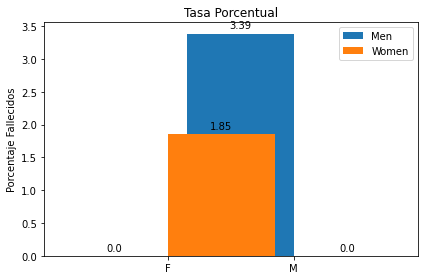

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = df_model111['Sexo']
men_means = df_model111['Tasa%HombresFallecen']
women_means = df_model111['Tasa%MujeresFallecen']

x = np.arange(len(labels))  # the label locations
width = 0.85  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentaje Fallecidos')
ax.set_title('Tasa Porcentual')
ax.set_xticks(x)

ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [17]:
df_model11

,Rango_Edad,Edad_Prom,TotalContagiados,Femenino,Masculino,Alentados,Activos,Fallecidos,Femenino_Normalizado,Masculino_Normalizado
0,0-5,3.0,27969,13468,14501,26118,1812,39,0.117234,0.135219
12,6-10,8.0,32268,15926,16342,30460,1783,25,0.138809,0.152473
2,11-15,13.0,43473,21966,21507,41013,2441,19,0.191826,0.200879
3,16-20,18.0,87003,43590,43413,82221,4712,70,0.381634,0.406182
4,21-25,23.0,176965,93431,83534,167843,8926,196,0.819119,0.782195
5,26-30,28.0,220812,114038,106774,209699,10777,336,1.000000,1.000000
6,31-35,33.0,205368,102528,102840,194286,10607,475,0.898970,0.963131
7,36-40,38.0,184868,91683,93185,174210,9886,772,0.803776,0.872644
8,41-45,43.0,145606,73682,71924,136104,8359,1143,0.645770,0.673386
9,46-50,48.0,124314,63413,60901,115394,7315,1605,0.555633,0.570079


# Analizando los resultados.
Como podemos ver, hay una mayor probabilidade de muerte por el virus entre los hombres, sin embargo, necesitamos saber si el genero es una variable a tener en cuenta para enseñarle a la maquina a clasificar, por lo que la variable genero, va a ser nuestra primera variable independiente que revisaremos en el modelo.


## FALLECIDOS POR SEXO-GENERO
Bajo la Hipotesis de que hay una relacion entre el genero y la muerte por el virus, encontramos su
Significancia:
## H0--> Genero Sí determina la muerte en el contagio por el virus.
## Ha--> Genero No determina la Muerte en el contagio por el virus.
Por lo que para poder probar la veracidad de la Hipotesis Nula, debemos demostrar que la variable dependiente **FALLECIDOS** está muy cercana a 0 por medio de la relación  **FALLECIDOS ~ GENERO **  y los agruparemos en la función dmatrices.

In [67]:
y, X = dmatrices('Fallecidos ~ Femenino_Normalizado', data=df_model11, return_type='dataframe')

# Visualizamos la variable dependiente H0-->Fallecidos

In [68]:
y

,Fallecidos
0,39.0
12,25.0
2,19.0
3,70.0
4,196.0
5,336.0
6,475.0
7,772.0
8,1143.0
9,1605.0


# Visualizamos la Matriz Generada por medio de la variable X

In [69]:
X

,Intercept,Femenino_Normalizado
0,1.0,0.117234
12,1.0,0.138809
2,1.0,0.191826
3,1.0,0.381634
4,1.0,0.819119
5,1.0,1.000000
6,1.0,0.898970
7,1.0,0.803776
8,1.0,0.645770
9,1.0,0.555633


In [70]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Fallecidos   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.855
Date:                Sat, 27 Nov 2021   Prob (F-statistic):              0.189
Time:                        17:04:42   Log-Likelihood:                -190.75
No. Observations:                  21   AIC:                             385.5
Df Residuals:                      19   BIC:                             387.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2903.0158 

# Las variables del modelo
## mod
por medio de la variable mod cargamos las variables del modelo estadistico que elegimos primero en este caso OLS
## res
por medio de la variable res le indicamos que nos devuelva el mejor fit del modelo mod
## res.summary()
por medio de esta instrucción le pedimos que nos imprima la regresión.  

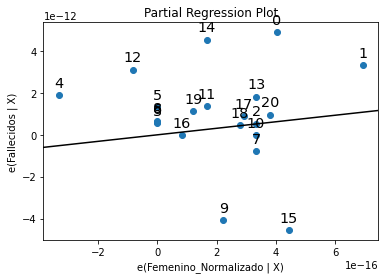

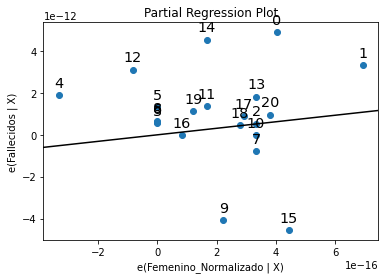

In [71]:
sm.graphics.plot_partregress('Fallecidos','Femenino_Normalizado', 'Rango_Edad',data=df_model11, obs_labels=True)

In [72]:
y, X = dmatrices('Fallecidos ~ Masculino_Normalizado', data=df_model11, return_type='dataframe')

In [73]:
mod2 = sm.OLS(y, X)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:             Fallecidos   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.803
Date:                Sat, 27 Nov 2021   Prob (F-statistic):              0.195
Time:                        17:04:46   Log-Likelihood:                -190.78
No. Observations:                  21   AIC:                             385.6
Df Residuals:                      19   BIC:                             387.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2902.29

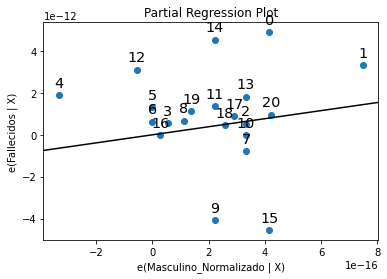

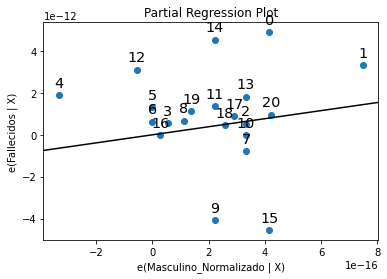

In [74]:
sm.graphics.plot_partregress('Fallecidos','Masculino_Normalizado', 'Rango_Edad',data=df_model11, obs_labels=True)

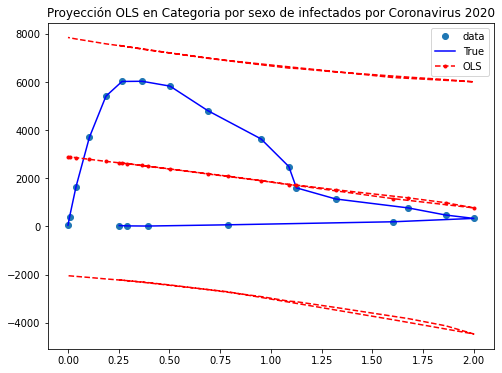

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
x=df_model11['Femenino_Normalizado']+df_model11['Masculino_Normalizado']
y_true=df_model11[['Fallecidos']]
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.set_title('Proyección OLS en Categoria por sexo de infectados por Coronavirus 2020',size=12)
ax.legend(loc='best');

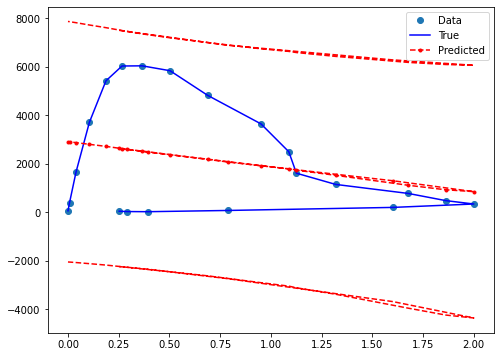

In [76]:
res2 = sm.OLS(y, X).fit()
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

# Grafica1.
Como poder mos ver en las graficas, las variables están muy alejadas de la regresión. 
# Grafica 2
y en el caso de las estimación la regresión OLS no sigue el mismo patron. 
# Grafica 3.
el comportamiento de la información real y la predicción de dicha distan mucho de tener el mismo comportamiento


# <https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html


# OBSERVACIONES
Dado que en el modelo estadistico o statsmodel, se demuestra la veracidad de la hipotesis nula H0 cuando esta llega a 0 o está muy cercana, y los minimos cuadrados R-squared se aproximan a uno. 
# Conclusiones:

H0--> B1==0
Ha--> B1<>0

Por lo que en este caso en el que el R-squared nos llegó a un 13.7% o 0.137 concluimos que no se cumple las condiciones para que la hipotesis nula sea cierta, en este caso, que el genero tenga algun tipo de incidencia en la muerte por el virus.
 de modo que las variables independientes, no tienen ningun tipo de relación, con la dependiente. 
 

# VISUALIZACION DE LOS PARAMETROS

In [77]:
res.params

Intercept               2903.015817
Femenino_Normalizado   -2131.115459
dtype: float64

# VISUALIZACION DE LOS PARAMETROS NORMALIZADOS

In [78]:
res.normalized_cov_params

,Intercept,Femenino_Normalizado
Intercept,0.111843,-0.176980
Femenino_Normalizado,-0.176980,0.487704


# VISUALIZACION DE LOS MINIMOS CUADRADOS

In [79]:
print('La relacion de sexo o genero es  devil con un Rcuadrado:')
print(res.rsquared)
print('en porcentajes:',res.rsquared*100,'%')

La relacion de sexo o genero es  devil con un Rcuadrado:
0.0889443310432817
en porcentajes: 8.89443310432817 %


# CAMBIO DE VARIABLES 
dado que la variable genero, no tiene relación alguna con la muerte por covid, procederemos a realizar un cambio de variables independientes, para poder medir cual de todas tiene una mayor rsquared.

## FALLECIDOS POR EDAD
Bajo la Hipotesis de que hay una relacion entre el genero y la muerte por el virus, encontramos su
Significancia:
## H0--> lA EDAD Sí Es una variable determinante en la muerte por contagio del virus.
## Ha--> lA EDAD No Es una variable determinante en la Muerte por contagio del virus.



In [80]:
df_model13=df_model1.groupby(by=['Rango_Edad']).agg({'Recuperado':'count',
                                                     'Edad':'mean', 
                                                     'Femenino':'sum',
                                                     'Masculino':'sum',
                                                     'Alentados':'sum',
                                                     'Activos':'sum',
                                                     'Fallecidos':'sum'
}).reset_index().round().sort_values(by='Edad',ascending=True)
df_model13=df_model13.rename(columns={'Recuperado':'TotalContagiados','Nombre departamento':'NombreDepartamento'})
df_model13.dropna()

,Rango_Edad,TotalContagiados,Edad,Femenino,Masculino,Alentados,Activos,Fallecidos
0,0-5,27969,3.0,13468,14501,26118,1812,39
12,6-10,32268,8.0,15926,16342,30460,1783,25
2,11-15,43473,13.0,21966,21507,41013,2441,19
3,16-20,87003,18.0,43590,43413,82221,4712,70
4,21-25,176965,23.0,93431,83534,167843,8926,196
5,26-30,220812,28.0,114038,106774,209699,10777,336
6,31-35,205368,33.0,102528,102840,194286,10607,475
7,36-40,184868,38.0,91683,93185,174210,9886,772
8,41-45,145606,43.0,73682,71924,136104,8359,1143
9,46-50,124314,48.0,63413,60901,115394,7315,1605


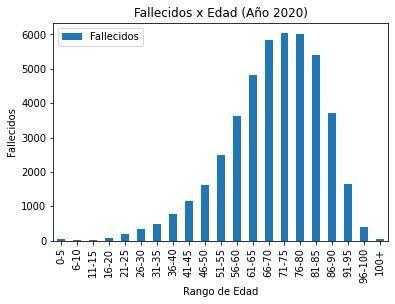

In [81]:
import matplotlib.pyplot as plt
df_model13.plot(kind='bar',x='Rango_Edad',y='Fallecidos')
#plt.title('Recuperados x Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Fallecidos')
plt.title('Fallecidos x Edad (Año 2020)')
#plt.annotate(text='%',xy=(x,y))
plt.show()

 #Observaciones

 Como podemos ver hay una alta prevalencia de sobrevivencia al virus por parte de los niños y adolescentes, que son los que pertenecen al cluster 0 y 1, y una alta prevalencia de descesos entre los más mayores que van desde el cluster 5 al 9, teniendo en cuenta que las personas mayores de 100 años son pocas, no podemos desestimar que aquellas dos mujeres de dicha edad que se muestran como recuperadas en el dataframe df_model13, sean las unicas o que no haya otras personas de la misma edad que si hayan fallecido.

 por esta misma razón procedemos a realizar el estudio de regresión OLS, que nos ayudará a entender mejor este comportamiento.  

In [82]:
y, X = dmatrices('Fallecidos ~ Edad', data=df_model13, return_type='dataframe')

In [83]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Fallecidos   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     7.305
Date:                Sat, 27 Nov 2021   Prob (F-statistic):             0.0141
Time:                        17:04:56   Log-Likelihood:                -188.31
No. Observations:                  21   AIC:                             380.6
Df Residuals:                      19   BIC:                             382.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.5157    879.393      0.073      0.9

In [84]:
0.0394*100

3.94

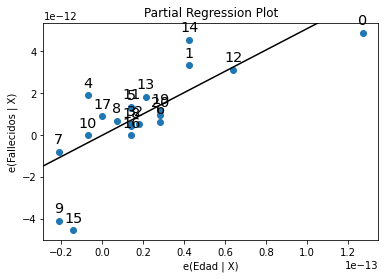

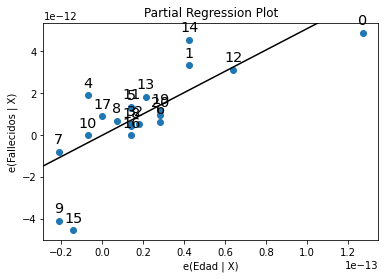

In [85]:
sm.graphics.plot_partregress('Fallecidos','Edad','Rango_Edad',data=df_model13, obs_labels=True)

A diferencia de la variable genero, podemos ver que la variable Edad si tiene un comportamiento muy parecido al de la regresión. 

nsample = len(df_model151)
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.cosh(x), (x-5)**2, np.ones(nsample)))
#X = np.column_stack((x, np.tan(x), (x-0)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) 
#X.OLSResults.normalized_cov_params()


prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'g-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

Como podemos ver en este caso los datos reales si están dentro del rango estimable por la regresión OLS

res2 = sm.OLS(y, X).fit()
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

dir(res)

Por ultimo podemos ver que la WLS si realizó una predicción perfecta de los rangos en los cuales puede encontrar los datos reales, la cual es muy colineal.

# Resumen
En este caso podemos ver que la variable Rsqurared, si dió un 100% de probabilidad de que la edad si sea una variable determinante en las muertes por covid, sin enbargo no podemos pasar por desapercibidos los problemas del modelo, dado que el modelo OLS minimiza la diferencia entre el valor predicho y el valor real, en nuestro caso, cuantos de los enfermos pueden llegar a morir dependiendo de su edad, por lo que debemos remitirnos a las otras estadisticas del modelo, como lo es el log-likelihood o la maxima verosimilitud, al ser una estimación logaritmica, podemos entender que a medida en que aumenta la edad, aumenta la probabilidad, por lo que si tenemos un buen estimador de que en el mundo real está sucediendo.

# Segunda prueba
dado que nuestro modelo funcionó perfectamente, procederemos a realizarle otras pruebas esta vez con una variable ordinal diferente como lo es el departamento, por lo que procedemos a realizar un nuevo daftrame ordenado por departamentos.

In [86]:
df_model14=df_model1.groupby(by=['Nombre departamento']).agg({'Recuperado':'count',
                                                     'Edad':'mean', 
                                                     'Femenino':'sum',
                                                     'Masculino':'sum',
                                                     'Alentados':'sum',
                                                     'Activos':'sum',
                                                     'Fallecidos':'sum'
}).reset_index().round()
df_model14=df_model14.rename(columns={'Recuperado':'TotalContagiados','Edad':'Edad_Prom','Nombre departamento':'Departamento'})
df_model14.dropna()

,Departamento,TotalContagiados,Edad_Prom,Femenino,Masculino,Alentados,Activos,Fallecidos
0,AMAZONAS,3278,36.0,1328,1950,3120,32,126
1,ANTIOQUIA,275736,39.0,142220,133516,253955,16816,4965
2,ARAUCA,4626,39.0,2094,2532,4347,144,135
3,ATLANTICO,38331,40.0,18531,19800,35759,1007,1565
4,BARRANQUILLA,58166,40.0,28553,29613,54232,2010,1924
5,BOGOTA,494806,39.0,259380,235426,444990,39613,10203
6,BOLIVAR,8400,40.0,4175,4225,7823,269,308
7,BOYACA,30135,40.0,14737,15398,27570,1914,651
8,CALDAS,33939,42.0,17487,16452,31130,2136,673
9,CAQUETA,15157,40.0,7362,7795,13869,752,536


procedemos a cargar el la matriz con la nueva variable ordinal.

In [87]:
def normalize_series(s):
    s=df_model14['TotalContagiados']
    return (s - s.min()) / (s.max() - s.min())

df_model14['TotalContagiados_Normalizado'] = normalize_series(df_model14['TotalContagiados'])


In [88]:
y, X = dmatrices('Fallecidos ~ Edad_Prom + TotalContagiados_Normalizado', data=df_model14, return_type='dataframe')

Cargamos el modelo.

In [89]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Fallecidos   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           6.13e-24
Time:                        17:04:59   Log-Likelihood:                -264.03
No. Observations:                  36   AIC:                             534.1
Df Residuals:                      33   BIC:                             538.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

dado que nos dió el mismo resultado con otra varialbe ordinal, confirmamos que la variable independiente de la edad, si es una de las variables que debemos entrar a estudiar más a fondo.

# la etnia, otra variable de estudio.

Relacion etnica

In [ ]:
col_etnia=df_model1['Nombre del grupo étnico'].unique()
col_etnia.tolist()

In [ ]:
df_model15=df_model1.groupby(by=['Nombre departamento','Nombre del grupo étnico']).agg({'Recuperado':'count',
                                                     'Edad':'count', 
                                                     'Femenino':'sum',
                                                     'Masculino':'sum',
                                                     'Alentados':'sum',
                                                     'Activos':'sum',
                                                     #'Nombre del grupo étnico':'count',
                                                     'Fallecidos':'sum'
}).reset_index()
df_model15=df_model15.rename(columns={'Recuperado':'TotalContagiados','Nombre del grupo étnico':'GrupoEtnico','Nombre departamento':'NombreDepartamento'})
#df_model151=df_model15[df_model15['Fallecidos']!=0,df_model15['GrupoEtnico']!='Sin Comunidad',df_model15['GrupoEtnico']!='']
df_model15


In [ ]:
df_model151=df_model15.drop(df_model15[(df_model15['GrupoEtnico']=='Por definir')].index)
df_model151

In [ ]:
df_model151=df_model151.drop(df_model151[(df_model151['GrupoEtnico']=='Sin Comunidad')].index)
df_model151['ContagiosNorm']=df_model151['TotalContagiados']/100

In [ ]:
df_model151['GrupoEtnico'].unique()

In [ ]:
df_model13.plot(kind='scatter',x='TotalContagiados',y='Fallecidos')
plt.title('Fallecidos x Grupo Etnico')
plt.xlabel('Grupo Etnico')
plt.ylabel('Fallecidos')
plt.title('Fallecidos x grupo')
#plt.annotate(text='%',xy=(x,y))
plt.show()

In [ ]:
y, X = dmatrices('Fallecidos ~ ContagiosNorm + NombreDepartamento', data=df_model151, return_type='dataframe')


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

In [ ]:
nsample = len(df_model151)
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.cosh(x), (x-5)**2, np.ones(nsample)))
#X = np.column_stack((x, np.tan(x), (x-0)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) 


In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'g-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');


In [ ]:
res2 = sm.OLS(y, X).fit()
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

Con esto encontramos nuestra ultima variable que tendremos en cuenta, para enseñarle a la maquina. 

In [ ]:
df_EdadSimple=df_model1[['Edad','Fallecidos']].dropna()
df_EdadSimple

In [ ]:
y, X = dmatrices('Fallecidos ~ Edad', data=df_EdadSimple, return_type='dataframe')

In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

In [ ]:
#Exportar a Excel
exportar=pd.ExcelWriter("grupos etnicos2_Covid.xlsx")
df_model1['Nombre del grupo étnico'].to_excel(exportar,sheet_name="listados etnicos",header=True)
exportar.save()

In [91]:
df_model11.to_excel('AgrupamientoSexoEdad.xlsx')